#### Assignment By : Gaurav Neapl
# <center> MNist database classification<br> <small>Réda DEHAK<br> 1 July 2020</small> </center>

The goal of this lab is :
    - Evaluate your understanding of the course
    - Try and make a comparison of different machine learning methods
    
This study is based on the <A href=http://yann.lecun.com/exdb/mnist/>MNist dataset</A>. It is handwritten digits dataset with a training set of 60000 samples, and a test set of 10000 samples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Questions:

- propose three different approaches to classify the MNist dataset. Compare the performance of each method and suggest solutions to improve the performance of each one. You can use all methods that you learned or not during the MSc. The goal is to obtain the best performances measure.
- Make a video of 5 minutes maximum to justify your choices and explain your results.
- Download the notebook and video on Teams before July 21th.

### Load the dataset
- MNist dataset is proposed in keras.datasets toolbox, you can use this code to load the dataset or use the function mnist_load_data provided in mnist.py file

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pypl-ot
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# First Method
## Image Classification using Convolutional Neural Network (CNN) Algorithm  


Reason of selection CNN Algorithm: 
The advantage choosing of CNN is that it automatically detects the important features without any human supervision. For example, given many pictures of numbers from 0 to 9, it can learn the key features for each class by itself

In [ ]:
#importing all needed need library and function
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#shape of train and test images
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

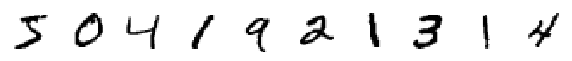

In [ ]:
#Loop to find the position of images
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

---> building the neural network, using a number of convolutional layers. specify input shape in the first layer and the last layer as output of prediction.: --,

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#summary of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

 --> preprocessing of the images. We’ll also use the first 50,000 training images for training, and 10,000 for training examples for cross validation.

In [ ]:
#Train and Test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[60000:]
validation_labels = train_labels[60000:]

train_images = train_images[:60000]
train_labels = train_labels[:60000]

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 37s 734us/step - loss: 0.1936 - accuracy: 0.9394 - val_loss: 0.0538 - val_accuracy: 0.9845
Epoch 2/5
50000/50000 [==============================] - 41s 815us/step - loss: 0.0524 - accuracy: 0.9837 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 3/5
50000/50000 [==============================] - 43s 864us/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0422 - val_accuracy: 0.9888
Epoch 4/5
50000/50000 [==============================] - 46s 912us/step - loss: 0.0277 - accuracy: 0.9919 - val_loss: 0.0374 - val_accuracy: 0.9900
Epoch 5/5
50000/50000 [==============================] - 49s 984us/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0394 - val_accuracy: 0.9892


In [ ]:
#evaluate test images and test labels & printing it's Accuracy and Loss:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 1s 105us/step
Accuracy: 0.9918000102043152
Loss:  0.029962181234539458


generate predictions for the test set:

In [ ]:
preds = model.predict(test_images)

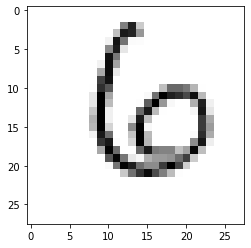

In [ ]:
# reload the test images so it will be in a format imshow() will understand
(_, _), (test_images, _) = mnist.load_data()

plt.imshow(test_images[100], cmap=plt.cm.binary) #print 100th poisitions of image from dataset

Hence, The output of the network was a layer with 100 units and a softmax activation, we will get an array of length 100 with a prediction for each potential number. Here you can see that the network is 99.9% certain it is a Six.

## Second Method:
#### Image classification using PyTorch Neural Networks
PyTorch: Neural Networks is well known for accuracy.

First, we need to import all the libraries and modules that we will need further on.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time
 
from torchvision import datasets

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

In [3]:
# get the data
trainset = datasets.MNIST(
    root = './data',
    train = True,
    download = True, 
    transform = transform
)
 
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = 4,
    shuffle = True
)
 
testset = datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)
 
testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size = 4,
    shuffle = False
)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


### Define the Neural Network
Here, I will define the neural network module and call it Net()

In [4]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, 
                               kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, 
                               kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=800, out_features=500)
        self.fc2 = nn.Linear(in_features=500, out_features=10)
 
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

i instantiate our Net() module and also transfer it onto the device. 

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [7]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##### Training Our Neural Network
Let’s first train our network as below: 


In [8]:
def train(net):
    start = time.time()
    for epoch in range(10): # no. of epochs
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # data pixels and labels to GPU if available
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            # set the parameter gradients to zero
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            # propagate the loss backward
            loss.backward()
            optimizer.step()
 
            # print for mini batches
            running_loss += loss.item()
            if i % 5000 == 4999:  # every 5000 mini batches
                print('[Epoch %d, %5d Mini Batches] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/5000))
                running_loss = 0.0
    end = time.time()
 
    print('Done Training')
    print('%0.2f minutes' %((end - start) / 60))
    
train(net)

[Epoch 1,  5000 Mini Batches] loss: 0.305
[Epoch 1, 10000 Mini Batches] loss: 0.086
[Epoch 1, 15000 Mini Batches] loss: 0.063
[Epoch 2,  5000 Mini Batches] loss: 0.047
[Epoch 2, 10000 Mini Batches] loss: 0.040
[Epoch 2, 15000 Mini Batches] loss: 0.041
[Epoch 3,  5000 Mini Batches] loss: 0.026
[Epoch 3, 10000 Mini Batches] loss: 0.030
[Epoch 3, 15000 Mini Batches] loss: 0.028
[Epoch 4,  5000 Mini Batches] loss: 0.018
[Epoch 4, 10000 Mini Batches] loss: 0.024
[Epoch 4, 15000 Mini Batches] loss: 0.020
[Epoch 5,  5000 Mini Batches] loss: 0.014
[Epoch 5, 10000 Mini Batches] loss: 0.012
[Epoch 5, 15000 Mini Batches] loss: 0.018
[Epoch 6,  5000 Mini Batches] loss: 0.009
[Epoch 6, 10000 Mini Batches] loss: 0.014
[Epoch 6, 15000 Mini Batches] loss: 0.013
[Epoch 7,  5000 Mini Batches] loss: 0.004
[Epoch 7, 10000 Mini Batches] loss: 0.009
[Epoch 7, 15000 Mini Batches] loss: 0.010
[Epoch 8,  5000 Mini Batches] loss: 0.006
[Epoch 8, 10000 Mini Batches] loss: 0.006
[Epoch 8, 15000 Mini Batches] loss

Testing Our Network on the Data set.


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
 
print('Accuracy of the network on test images: %0.3f %%' % (
    100 * correct / total))

Accuracy of the network on test images: 99.200 %


Here you can see that the network is 99.2%.

## Third Method:
### Linear Support Vector Classification
I used LinearSVC here because it is fast enough to preprocessing and train model

In [1]:

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
clf = LinearSVC()



# print("Train model")
clf.fit(train_images, train_labels)


# print("Compute predictions")
predicted = clf.predict(test_images)

print("Accuracy: ", accuracy_score(test_labels, predicted))

Using TensorFlow backend.


Accuracy:  0.8815


C:\Users\nepal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Comparison

....

#### Occuracy using three different image classifier algorithms: 
###### Using CNN Algorithm: 
    Accuracy: 0.9918000102043152
###### Using  PyTorch Neural Networks:
    accuracy:  0.992 
###### Using Linear support vector classification: 
    accuracy: 0.819
        
As we can see above,NN algorithm has highest accuracy of 0.992, where as 0.991 and 0,819 using CNN and Linear support vector classifier respectively. 

## Conclusions and Perspectives:

...

As I train the claffier model using three different classifier algorithm, I obrserve that Pytourch NN model is best for accuracy of 0.992 but it consume more time for preprocessing, whereas Linear SVC takes very less time but it's accuracy is less than CNN and NN classifier algorithms. As we clearly see in Comparison, I observe that Pytourch Neural Networks is best for accuracy. 